<a href="https://colab.research.google.com/github/gyuheon1/AIStudy24/blob/master/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

특성 공학

여러 특성을 사용한 다중회귀에 대해서 알아보자.

다항 회귀로는 농어의 무게를 어느정도인지 짐작할 수는 있다. (과소적합??)

과소적합을 해결하려면 제곱보다 더 고차항을 넣어야 함 -> 길이 + 무게 + 높이 + 두께 등....


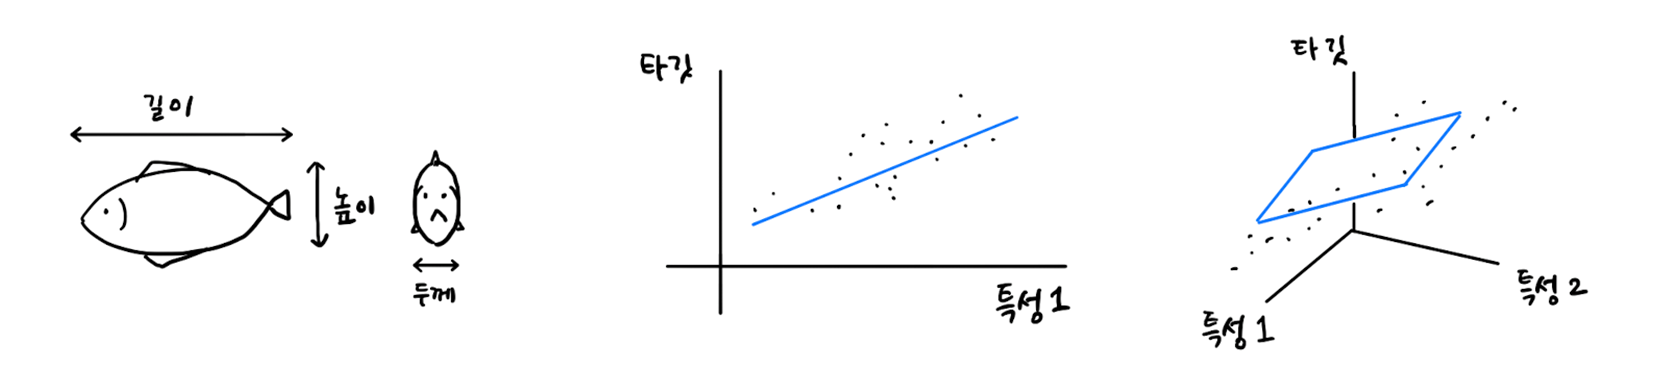

In [2]:
# 다중회귀 : 여러개의 특성을 사용한 선형회귀

# 농어의 길이 뿐만 아니라 농어의 높이와 두께도 특성에 포함 하겠다.
# 3개의 특성을 제곱하여 추가해야 한다.
# 각 특성을 서로 곱해서 또 다른 특성을 만들수 있다.
# 이런 특성을 사용해서 새로운 특성을 뽑아내는 것을 특성공학이라고 함

In [3]:
# 데이터 준비 -> 판다스에서 제공하는 데이터 프레임을 사용해보자.
# 판다스 : 데이터분석용 라이브러리임 (csv -> 배열로)
# csv 파일은 엑셀에서 텍스트를 뽑아낸 메모장 파일

import pandas as pd # 관례적인 판다스 별칭
# 다중 회귀 : 물고기의 길이와 무게도 있지만 너비도 존재하니
# 더 자세한 회귀가 도출 될꺼야 (3차원 공간을 형성함)

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
# length, height, width
# 길이,   높이,   너비,

import numpy as np

# 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)
# 훈련세트와 테스트세트로 나눔

print(train_input[0]) # 판다스에서 받은 데이터 (length, height, width)

[19.6   5.14  3.04]


In [6]:
print(train_target[0])  # 넘파이 데이터 (무게 perch_weight)

85.0


In [7]:
# 위 데이터를 사용해서 새로운 특성을 만들겠다.!!!
# 사이킷런 변환기 : 특성을 만들거나 전처리하는 클래스가 있다.
# 변환기(Transformer) : fit(), transform() 메서드가 있다.

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]]) # 2개의 특성을 가진 2와 3으로 이루어진 샘플 하나를 적용
print(poly.transform([[2, 3]]))
# fit() 메서드와 transform() 메서드를 차례대로 실행(훈련을 해야 변환이 됨)

[[1. 2. 3. 4. 6. 9.]]


In [8]:
# [[1. 2. 3. 4. 6. 9.]]
# 1 (bias)
# 2
# 3
# 4 = 2 ** 2
# 6 = 2 * 3
# 9 = 3 ** 2

# PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함
# 2와 3을 각기 제곱한 4와 9가 추가 되고, 2와 3을 곱한 6이 추가됨
# 무게 = a * 길이 + b * 높이 + c * 두께 + d + 1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수임 -> (길이, 높이, 두께, 1)

In [9]:
poly = PolynomialFeatures(include_bias=False)
#                           1 삭제 (자동으로 절편 항은 무시하지만 알아두면 좋음)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 졌는지 확인

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [11]:
# 실제로 훈련시작용 생성
poly = PolynomialFeatures(include_bias=False)
# 사이킷런의 선형 모델은 자동으로 bias를 추가하므로
# bias 특성을 만들 필요 없으므로 include_bias를 False로 지정한다.

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 42개의 요소에 9개의 특성

(42, 9)


In [12]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 젔는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [13]:
test_poly = poly.transform(test_input) # 테스트용 세트 변환

In [14]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
# 99%의 아주 좋은 점수가 나옴 (물고기의 길이, 높이, 두께까지 사용한 결과)

0.9903183436982125


In [15]:
print(lr.score(test_poly, test_target))
# 농어의 길이만을 사용했을 때에 있던 과소적합 문제는 나타나지 않음

0.9714559911594111


In [16]:
print(poly.degree) # 특성조합수 기본값 2

2


In [17]:
# 만약 정확한 값을 보기 위해서 특성 조합수를 더 늘리면????
# 특성을 추가하여 3제곱 4제곱 5제곱 항을 추가한다. -> degree=5
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 특성 개수가 55개로 증가됨

(42, 55)


In [18]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 젔는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [19]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [20]:
print(lr.score(test_poly, test_target)) #테스트 점수가 왜이럴까요????

-144.40579436844948


In [21]:
# 자료보다 특성이 많아서 생긴 결과물

# 특성 개수를 크게 늘리면 선형모델은 아주 강력해 짐
# 하지만, 이런 모델은 훈련 세트에 너무 과대적합됨
# 특히 훈련세트가 44개이지만 55개의 특성을 넣으면 어떻게 될까요?


# 규제(regularization) : 훈련세트를 너무 과도하게 학습하지 못하게 훼방하는 것
# 훈련세트에 과대적합이 되지 않도록 만드는 것

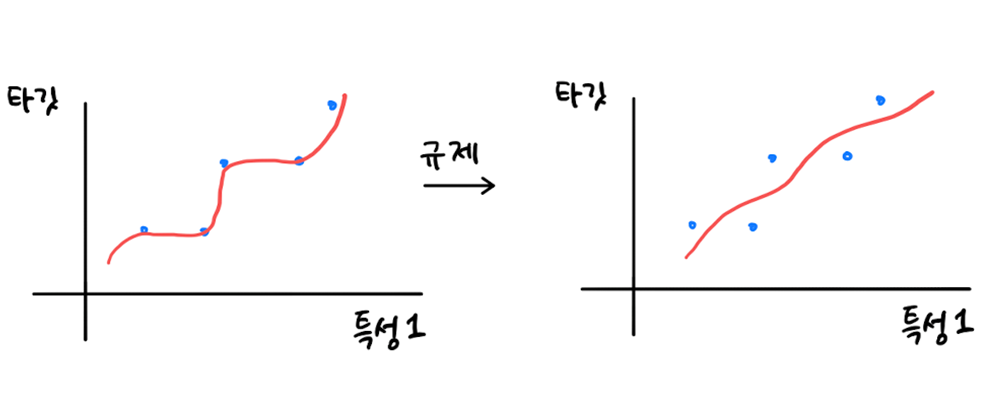

In [22]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 싸이킷런 데이터 전처리 스케일 조정(스케일러) -> 표준점수로 변환시켜줌
ss = StandardScaler()   # 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환필수
ss.fit(train_poly)

train_scaled = ss.transform(train_poly) # 트레이닝용
test_scaled = ss.transform(test_poly) # 테스트용
# 표준 점수로 변환한 train_scaled, test_scaled 준비완료

In [23]:
# 선형 회귀 모델에 규제를 추가한 모델은 2개가 있다.
# 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제 (선호)
# 라쏘(lasso) : 계수의 절대값을 기준으로 규제를 적용 -> 0으로 제공 가능

In [24]:
# 릿지회귀 : 모델 객체를 만들고 fit() -> score()
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) # fit로 훈련하고 score로 평가함
print(ridge.score(train_scaled, train_target))
# 테스트결과 좋은 성능입을 판단할 수 있다. (모델 객체 생성시 alpha 매개변수로 규제의 강도를 조절함)

0.9896101671037343


In [25]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [26]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임으로 조절할 수 있다.
# 모델 객체를 만들때 alpha 매개값을 주면 됨
# alpha 값을 크게 주면 강도가 세짐, 계수값을 더 줄이고 조금 더 과소적합되록 유도하는 용도

# 적절한 alpha 값을 찾는 방법은 그래프로 그려 봐야 한다.
import matplotlib.pyplot as plt

train_score = []
test_score = []
# alpha 값을 바꿀때 마다 score() 메서드의 결과 값을 저장할 리스트 생성

In [27]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001 ~ 10배씩 증가
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

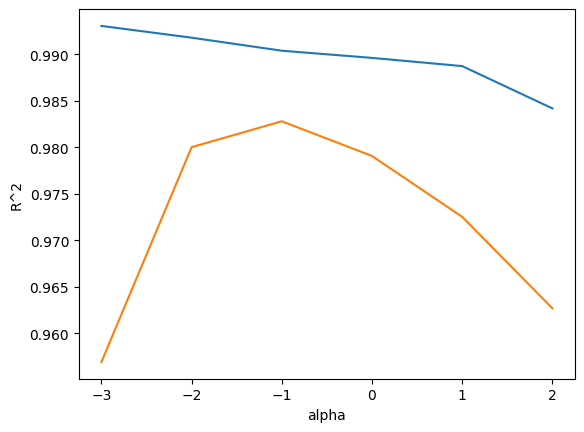

In [28]:
# 위 결과를 차트로 보자!!!

# .log10(alpha_list) x축 값이 너무 촘촘하게 보일까봐 지수형식으로 표현
# 0.001 : -3, 0.01 : -2  0.1 : -1
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list), test_score) # 주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 0.1 일때 제일 좋은 점수로 파악이 됨

In [29]:
ridge = Ridge(alpha=0.1)    # 제일 좋은 값으로 적용
ridge.fit(train_scaled, train_target)   # 훈련

print(ridge.score(train_scaled, train_target))  # 평가
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [30]:
# 라쏘로 규제 해보기

from sklearn.linear_model import Lasso # import 부분이 변경됨

lasso = Lasso() # 이부분이 변경됨
lasso.fit(train_scaled, train_target) # 훈련하고 점수환산
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [31]:
print(lasso.score(test_scaled, test_target)) # 릿지만큼의 규제가 적용되어 안정적이다.

0.9800593698421883


In [32]:
# 지금 기본값도 안정적이지만 알파값을 조절하면 더 좋은 값을 찾을 수 있겠다???

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000) # 최대 반복횟수(정확도를 위함)
    # 라쏘 모델은 최적의 계수를 찾기위해 반복적인 계산을 수행함

    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 위에 만든 리스트에 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

# 라쏘 테스트시 반복계산을 하는데 지정한 반복횟수가 부족하면 경고가 발생 ConvergenceWarning

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


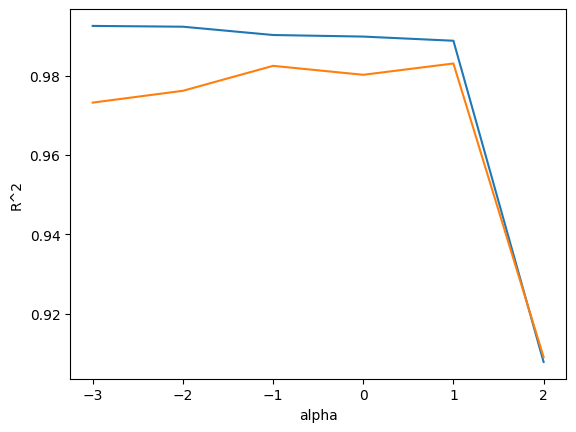

In [33]:
# 위에서 만든 리스트를 차트로 보자
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list), test_score) # 주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 왼쪽은 과대 적합, 오른쪽은 정상 (제일 좋은 값은 1 => 10)

In [34]:
# 라쏘 모델의 최적의 알파값은 1 -> 10^1=10
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
